In [1]:
import numpy as np
from numpy import pi
# importing Qiskit
from qiskit import QuantumCircuit, transpile, assemble
from qiskit.visualization import plot_circuit_layout
from qiskit.test.mock import FakeVigo

In [2]:
#3 examples, see initial code, output code, the way it is routed on qubits
def qft_rotations(circuit, n):
    """Performs qft on the first n qubits in circuit (without swaps)"""
    if n == 0:
        return circuit
    n -= 1
    circuit.h(n)
    for qubit in range(n):
        circuit.cp(pi/2**(n-qubit), qubit, n)
    # At the end of our function, we call the same function again on
    # the next qubits (we reduced n by one earlier in the function)
    qft_rotations(circuit, n)
    
def swap_registers(circuit, n):
    for qubit in range(n//2):
        circuit.swap(qubit, n-qubit-1)
    return circuit

def qft(circuit, n):
    """QFT on the first n qubits in circuit"""
    qft_rotations(circuit, n)
    swap_registers(circuit, n)
    return circuit
def inverse_qft(circuit, n):
    """Does the inverse QFT on the first n qubits in circuit"""
    # First we create a QFT circuit of the correct size:
    qft_circ = qft(QuantumCircuit(n), n)
    # Then we take the inverse of this circuit
    invqft_circ = qft_circ.inverse()
    # And add it to the first n qubits in our existing circuit
    circuit.append(invqft_circ, circuit.qubits[:n])
    return circuit.decompose() # .decompose() allows us to see the individual gates

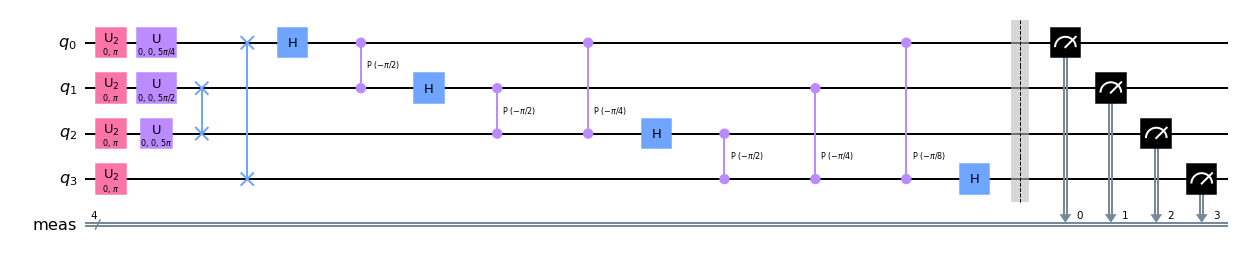

In [3]:
nqubits = 4
number = 5
qc = QuantumCircuit(nqubits)
for qubit in range(nqubits):
    qc.h(qubit)
qc.p(number*pi/4,0)
qc.p(number*pi/2,1)
qc.p(number*pi,2)

qc = inverse_qft(qc, nqubits)
qc.measure_all()
qc.draw(output='mpl')

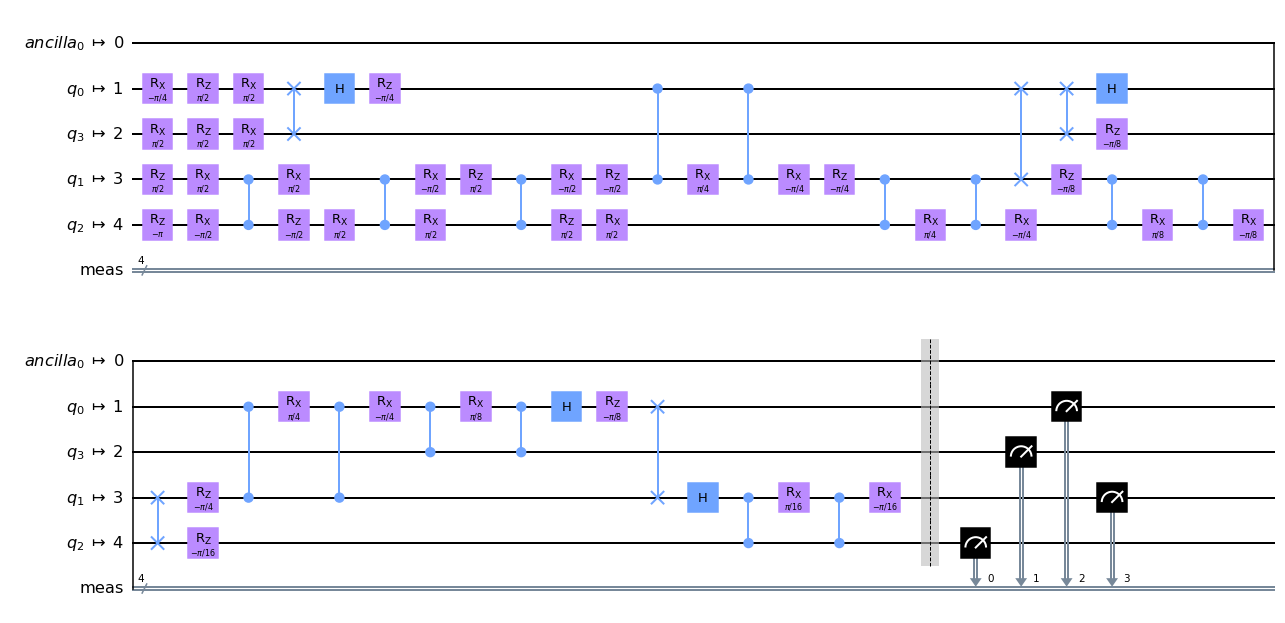

In [4]:
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_circuit_layout
from qiskit.test.mock import FakeVigo
backend = FakeVigo()

backend.configuration().basis_gates = ['id', 'rz', 'rx', 'cz', 'h', 'swap']
new_circ_lv3 = transpile(qc, backend=backend, optimization_level=3)
new_circ_lv3.draw(output='mpl')

['id', 'rz', 'sx', 'x', 'cx']


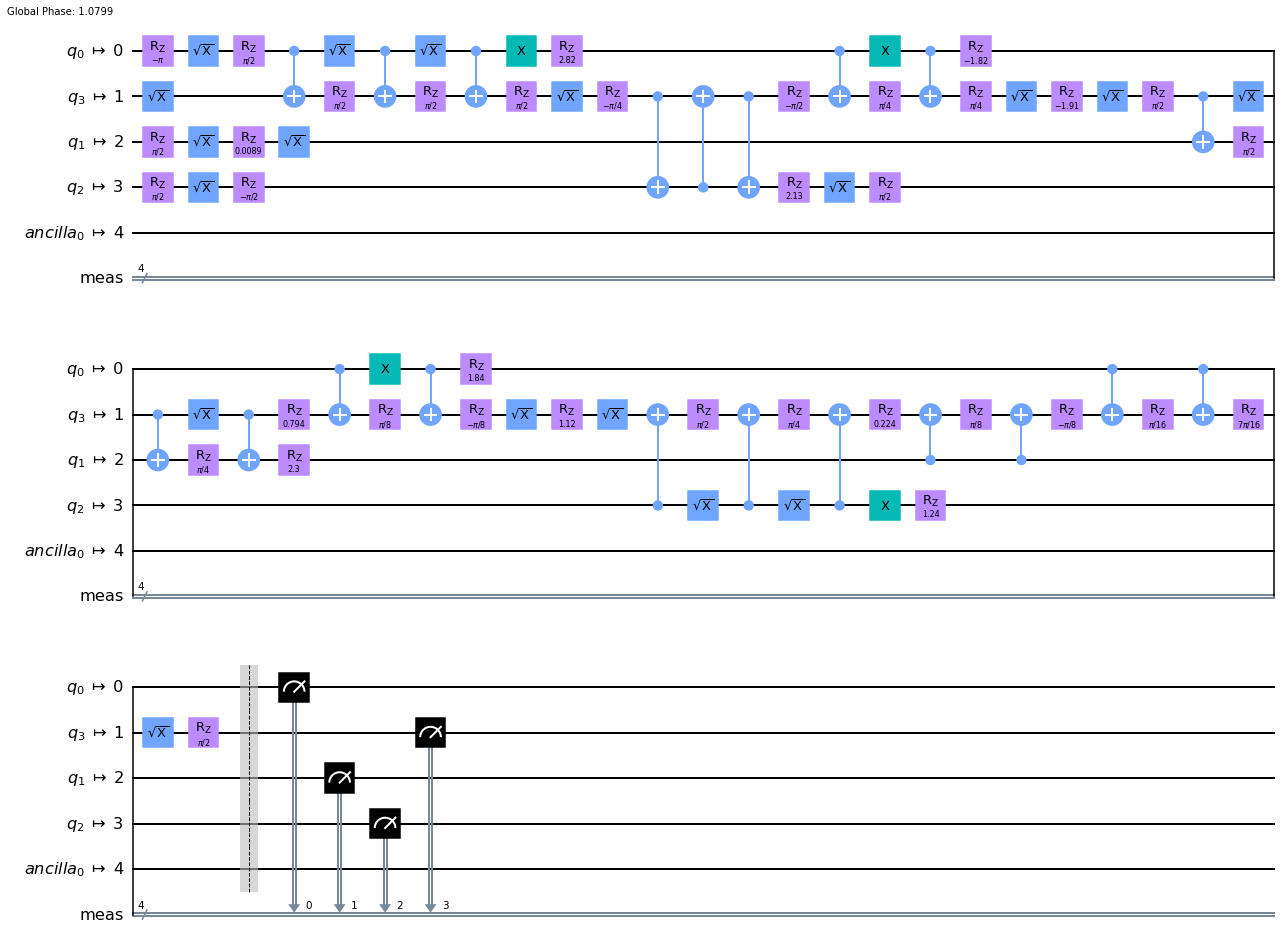

In [5]:
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_circuit_layout
from qiskit.test.mock import FakeVigo
backend = FakeVigo()

print(backend.configuration().basis_gates)
new_circ_lv3 = transpile(qc, backend=backend, optimization_level=3)
new_circ_lv3.draw(output='mpl')

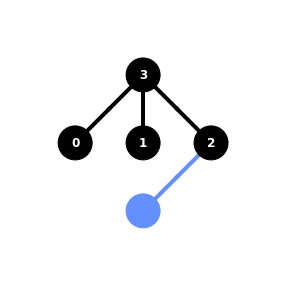

In [6]:
plot_circuit_layout(new_circ_lv3, backend)

In [7]:
# class rootSwap(qe.UnitaryGate):
#     def __init__(self):
#         super().__init__(
#             data=np.array(
#                 [
#                     [1, 0, 0, 0],
#                     [0, 0.5 * (1 + 1j), 0.5 * (1 - 1j), 0],
#                     [0, 0.5 * (1 - 1j), 0.5 * (1 + 1j), 0],
#                     [0, 0, 0, 1],
#                 ]
#             ),
#             label=r"$\sqrt{SWAP}$",
#         )
from qiskit import QuantumCircuit, QuantumRegister
from qiskit.quantum_info.operators import Operator
circuit = QuantumCircuit(2, name="$Swap^{1/2}$")
cx = Operator([
                    [1, 0, 0, 0],
                    [0, 0.5 * (1 + 1j), 0.5 * (1 - 1j), 0],
                    [0, 0.5 * (1 - 1j), 0.5 * (1 + 1j), 0],
                    [0, 0, 0, 1],
                ])
                
circuit.unitary(cx, [0, 1])
rootSwap = circuit.to_gate()

#### I Suspect those angles may be wrong and needs double checking

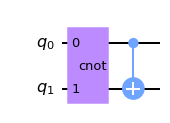

In [8]:
temp = QuantumCircuit(2, name="cnot")
temp.ry(np.pi,1)
temp.append(rootSwap, [0,1])
temp.z(0)
temp.append(rootSwap, [0,1])
temp.rz(-np.pi, 1)
temp.rz(-np.pi,0)
temp.ry(-np.pi, 1)
custom_cnot_gate = temp.to_gate()

# circuit = QuantumCircuit(3)
# circuit.h(0)
# circuit.append(custom_gate, [0,1])
# circuit.cx(1, 2)

circuit = QuantumCircuit(2)
circuit.append(custom_cnot_gate, [0,1])
circuit.cx(0,1)
circuit.draw(output='mpl')


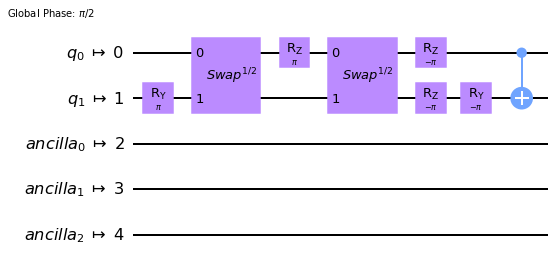

In [9]:
backend = FakeVigo()
backend.configuration().basis_gates = ['id', 'rz', 'ry', 'cx', 'h', '$Swap^{1/2}$']
new_circ_lv3 = transpile(circuit, backend=backend, optimization_level=3)
new_circ_lv3.draw(output='mpl')

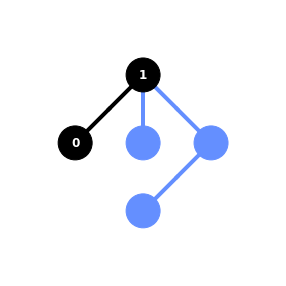

In [10]:
plot_circuit_layout(new_circ_lv3, backend)

True


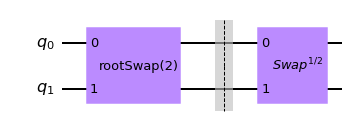

In [11]:
#define a root swap out of CX gates
temp = QuantumCircuit(2, name="rootSwap(2)")
"""temp.cx(1,0)
temp.ry(np.pi/2,1)
temp.rz(np.pi/16, 1)
temp.cx(0,1)
temp.rz(np.pi/8,0)
temp.rz(-np.pi/8,1)
temp.cx(0,1)
temp.rz(np.pi/16,1)
temp.ry(-np.pi/2,1)
temp.cx(1,0)"""
temp.cx(0,1)
temp.h(0)
temp.rz(np.pi/4,0)
temp.rz(-np.pi/4,1)
temp.h(0)
temp.h(1)
temp.cx(0,1)
temp.h(0)
temp.h(1)
temp.rz(-np.pi/4,0)
temp.h(0)
temp.cx(0,1)
temp.rz(-np.pi/2, 0)
temp.rz(np.pi/2,1)
custom_rootswap__gate = temp.to_gate()

print(Operator(custom_rootswap__gate).equiv(Operator(rootSwap)))

circuit = QuantumCircuit(2)
circuit.append(custom_rootswap__gate, [0,1])
circuit.barrier()
circuit.append(rootSwap,[0,1])

circuit.draw(output='mpl')

Successfully decomposes if a cx is present in basis

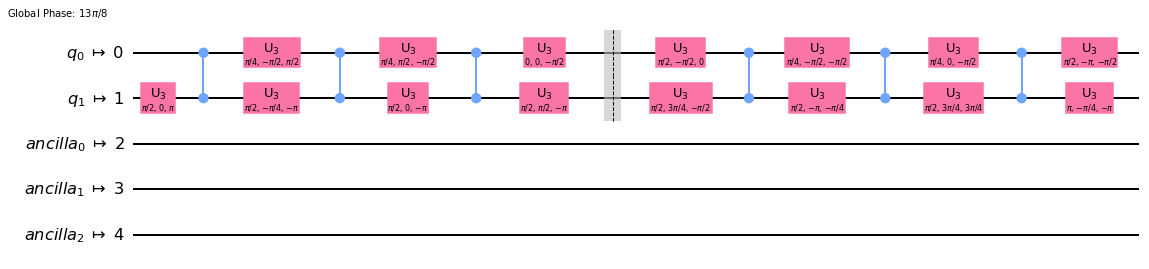

In [12]:
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_circuit_layout
from qiskit.test.mock import FakeVigo
backend = FakeVigo()

backend.configuration().basis_gates = ['id', 'u3', 'cz']
new_circ_lv3 = transpile(circuit, backend=backend, optimization_level=3)
new_circ_lv3.draw(output='mpl')

Cannot decompose into rootSwap despite equivalency

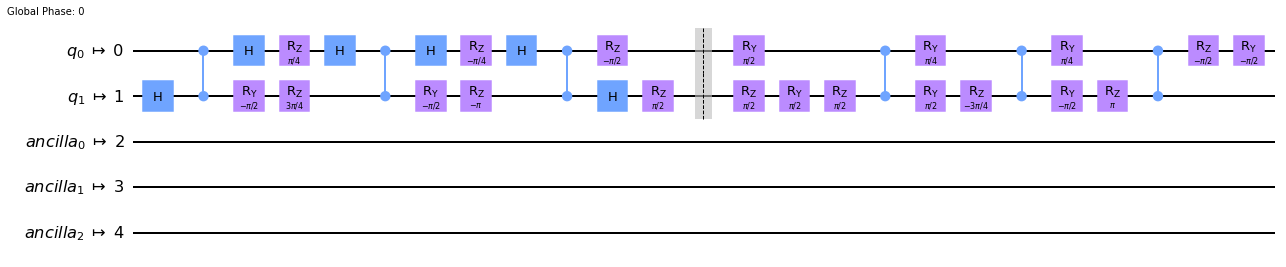

In [13]:
backend = FakeVigo()
backend.configuration().basis_gates = ['id', 'rz', 'ry', 'h', 'swap', 'cz'] #['id', 'rz', 'ry', 'h', '$Swap^{1/2}$']
new_circ_lv3 = transpile(circuit, backend=backend, optimization_level=3)
new_circ_lv3.draw(output='mpl')

In [14]:
from qiskit.test.mock import FakeBackend
from qiskit.providers import BaseBackend
from qiskit.providers.models import BackendProperties, BackendConfiguration
from qiskit.providers.models.backendconfiguration import GateConfig, QasmBackendConfiguration
from qiskit.visualization import plot_histogram, plot_gate_map, plot_circuit_layout

class LNN4(FakeBackend):
    """A fake 4 qubit linear backend."""

    def __init__(self):
        cmap = [[0,5],[0,10],[0,15], [5,0], [5,10], [5,15], [10,0], [10,5], [10,15], [15,0], [15,5], [15,10]]
        import itertools
        cmap += itertools.product(range(0,5), repeat=2)
        cmap += itertools.product(range(5,10), repeat=2)
        cmap += itertools.product(range(10,15), repeat=2)
        cmap += itertools.product(range(15,20), repeat=2)


        configuration = QasmBackendConfiguration(
            backend_name='fake_lnn4',
            backend_version='0.0.0',
            n_qubits=20,
            basis_gates=['id', 'rz', 'ry', 'cz', 'h','swap'],
            simulator=False,
            local=True,
            conditional=False,
            open_pulse=False,
            memory=False,
            max_shots=65536,
            gates=[GateConfig(name='TODO', parameters=[], qasm_def='TODO')],
            coupling_map=cmap,
        )

        super().__init__(configuration)

plot_gate_map(LNN4(), plot_directed=True, qubit_coordinates=qubit_coordinates)

NameError: name 'qubit_coordinates' is not defined

In [ ]:
import itertools
from qiskit.test.mock.utils import ConfigurableFakeBackend
from qiskit.visualization import plot_histogram, plot_gate_map, plot_circuit_layout
coupling_map = [[0,5],[0,10],[0,15], [5,0], [5,10], [5,15], [10,0], [10,5], [10,15], [15,0], [15,5], [15,10]]
coupling_map += itertools.product(range(0,5), repeat=2)
coupling_map += itertools.product(range(5,10), repeat=2)
coupling_map += itertools.product(range(10,15), repeat=2)
coupling_map += itertools.product(range(15,20), repeat=2)
qubit_coordinates = [[2,3], [1,2], [0,2],[0,4],[1,4], [3,4], [2,5],[2,6],[4,6],[4,5],[4,3],[5,4],[6,4],[6,2], [5,2], [3,2], [4,1],[4,0],[2,0],[2,1]]
basis_gates=['id', 'rz', 'ry', 'cz', 'h','swap']#, '$Swap^{1/2}$']
backend = ConfigurableFakeBackend(name='fake_lnn4', n_qubits=20, coupling_map=coupling_map, basis_gates=basis_gates, single_qubit_gates=['id', 'rz', 'ry', 'h'])
plot_gate_map(backend, plot_directed=True, qubit_coordinates=qubit_coordinates)

QiskitError: 'cz is not supported by fake backend builder.'

In [ ]:
from mock_backend import FakeHatlab, LegacyFakeHatlab
backend = FakeHatlab()
plot_gate_map(LegacyFakeHatlab(), plot_directed=True, qubit_coordinates=backend.qubit_coordinates)

AttributeError: 'FakeHatlab' object has no attribute 'qubit_coordinates'

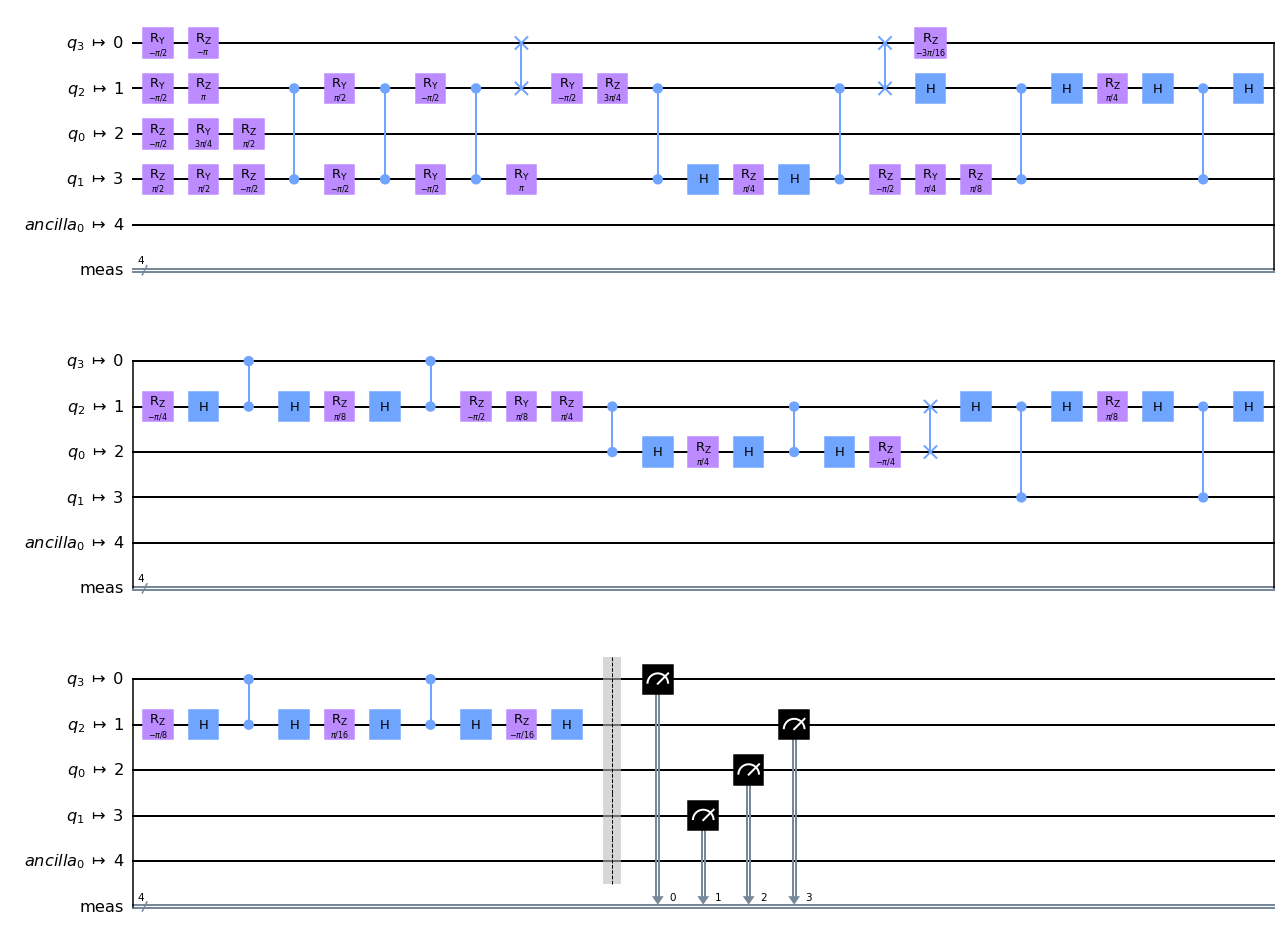

In [ ]:
new_circ_lv3 = transpile(qc, backend=backend, optimization_level=3)
new_circ_lv3.draw(output='mpl')

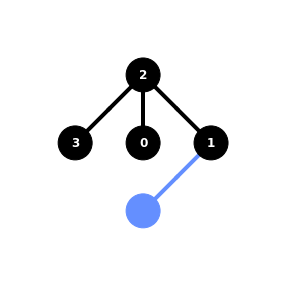

In [ ]:
plot_circuit_layout(new_circ_lv3, backend)

In [ ]:
FakeVigo().configuration().gates

[GateConfig(id, [], gate id q { U(0, 0, 0) q; }, [[0], [1], [2], [3], [4]]),
 GateConfig(rz, ['theta'], gate rz(theta) q { U(0, 0, theta) q; }, [[0], [1], [2], [3], [4]]),
 GateConfig(sx, [], gate sx q { U(pi/2, 3*pi/2, pi/2) q; }, [[0], [1], [2], [3], [4]]),
 GateConfig(x, [], gate x q { U(pi, 0, pi) q; }, [[0], [1], [2], [3], [4]]),
 GateConfig(cx, [], gate cx q0, q1 { CX q0, q1; }, [[0, 1], [1, 0], [1, 2], [1, 3], [2, 1], [3, 1], [3, 4], [4, 3]])]

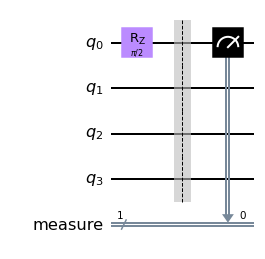

In [16]:
circ = QuantumCircuit(4)
from qiskit.circuit.library.standard_gates import RZXGate
# circ.append(RZXGate(np.pi / 2), [0,1])
circ.rz(np.pi/2, 0)
circ.measure_active()
#circ_trans = transpile(circ, backend=FakeVigo(), optimization_level=3)
circ.draw(output='mpl')

In [17]:
from qiskit.test.mock import FakeMumbaiV2, FakeMumbai
backend = FakeMumbaiV2()
backend.operation_names

This backend's operations: rz,rzx_90,rzx_45,rzx_30 only apply to a subset of qubits. Using this property to get 'basis_gates' for the transpiler may potentially create invalid output


['rz', 'x', 'sx', 'cx', 'rzx_90', 'rzx_45', 'rzx_30', 'reset', 'measure']

In [22]:
backend.target.get_non_global_operation_names()

['rz', 'rzx_90', 'rzx_45', 'rzx_30']

In [27]:
import logging
logging.basicConfig(level='DEBUG')

In [37]:
from qiskit.transpiler.passes import BasisTranslator
from qiskit import QuantumCircuit
from qiskit.compiler import transpile
from qiskit.transpiler import PassManager

from qiskit.circuit.library.standard_gates.equivalence_library import (
    StandardEquivalenceLibrary,
)
backend = FakeMumbaiV2() #FakeVigo()

pass_ = BasisTranslator(StandardEquivalenceLibrary, None, target=backend.target)
pm = PassManager(pass_)
circ_trans = pm.run(circ)
circ_trans.draw(output='mpl')

#circ_trans = transpile(circ, backend=backend, optimization_level=3)
#This backend's operations: rz,rzx_90,rzx_45,rzx_30 only apply to a subset of qubits. Using this property to get 'basis_gates' for the transpiler may potentially create invalid output
circ_trans.draw(output='mpl')

TranspilerError: "Unable to map source basis {('rz', 1), ('measure', 1)} to target basis {'measure', 'barrier', 'snapshot', 'reset', 'sx', 'cx', 'x'} over library <qiskit.circuit.equivalence.EquivalenceLibrary object at 0x7f6c4d5b6fd0>."

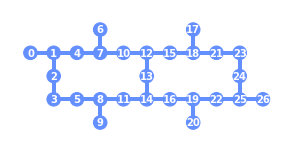

In [ ]:
from qiskit.visualization import plot_histogram, plot_gate_map, plot_circuit_layout
plot_gate_map(FakeMumbai(), plot_directed=True)

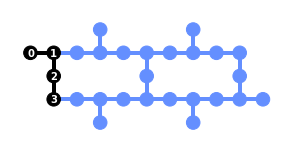

In [ ]:
plot_circuit_layout(circ_trans, FakeMumbai())